In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ConsPensionModel import PensionConsumerType
from IPython import get_ipython
from utilities import plot_3d_func

figures_path = "../../content/figures/"

/home/alujan/mambaforge-pypy3/envs/egmn-dev/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
agent = PensionConsumerType(cycles=19)

In [4]:
agent.solve()

T = 0

## Post Decision Stage

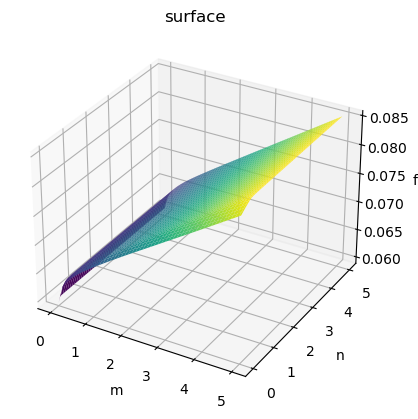

In [5]:
plot_3d_func(agent.solution[T].post_decision_stage.v_func.vFuncNvrs, 0, 5)

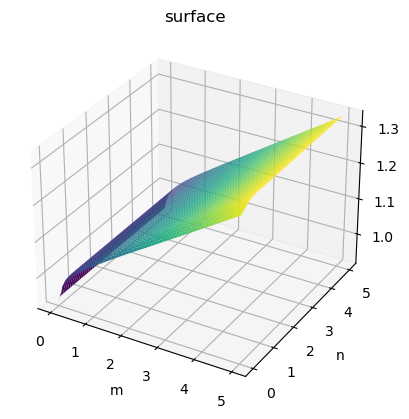

In [6]:
plot_3d_func(agent.solution[T].post_decision_stage.dvda_func.cFunc, 0, 5)

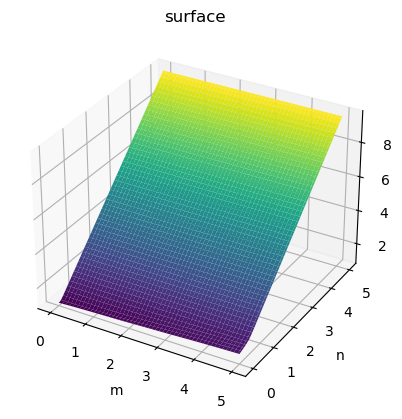

In [7]:
plot_3d_func(agent.solution[T].post_decision_stage.dvdb_func.cFunc, 0, 5)

## Consumption Stage

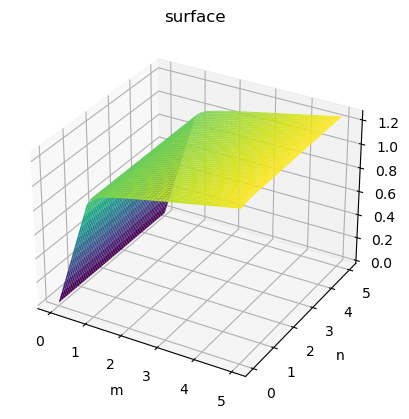

In [8]:
plot_3d_func(agent.solution[T].consumption_stage.c_func, 0, 5)

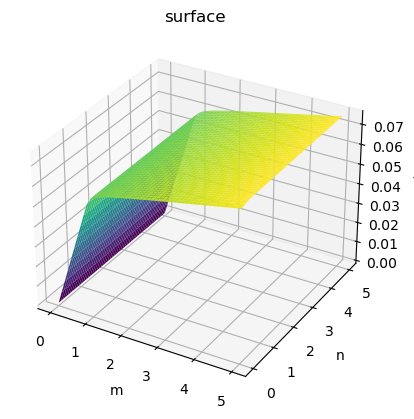

In [9]:
plot_3d_func(agent.solution[T].consumption_stage.v_func.vFuncNvrs, 0, 5)

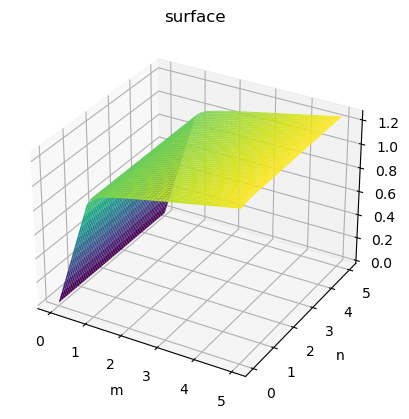

In [10]:
plot_3d_func(agent.solution[T].consumption_stage.dvdl_func.cFunc, 0, 5)

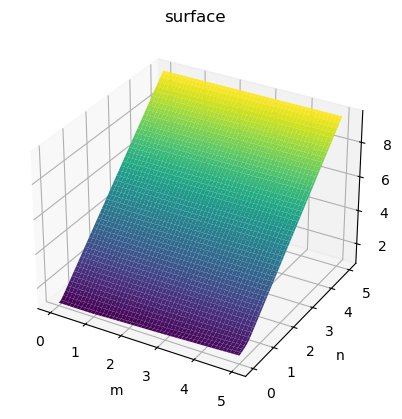

In [11]:
plot_3d_func(agent.solution[T].consumption_stage.dvdb_func.cFunc, 0, 5)

## Deposit Stage

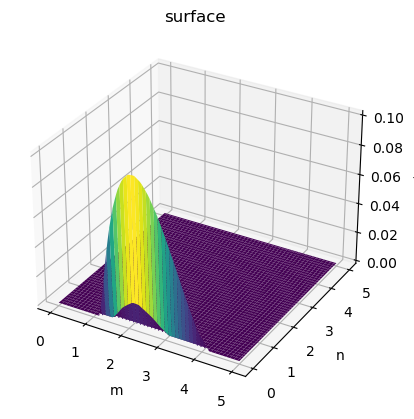

In [12]:
plot_3d_func(agent.solution[T].deposit_stage.d_func, 0, 5)

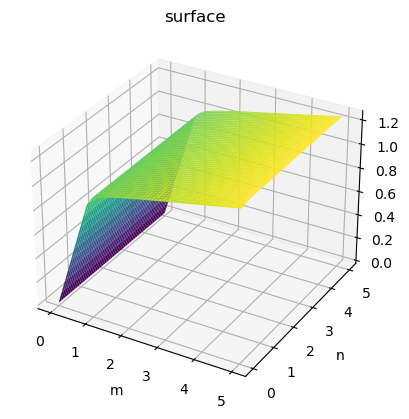

In [13]:
plot_3d_func(agent.solution[T].deposit_stage.c_func, 0, 5)

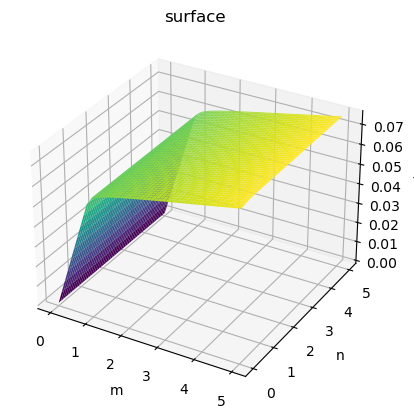

In [14]:
plot_3d_func(agent.solution[T].deposit_stage.v_func.vFuncNvrs, 0, 5)

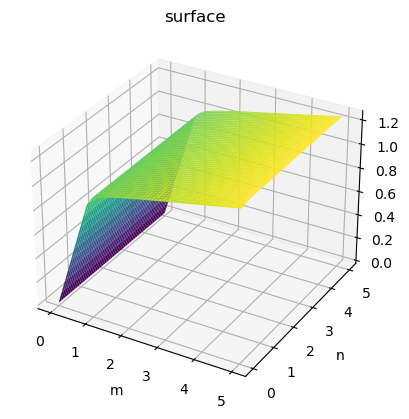

In [15]:
plot_3d_func(agent.solution[T].deposit_stage.dvdm_func.cFunc, 0, 5)

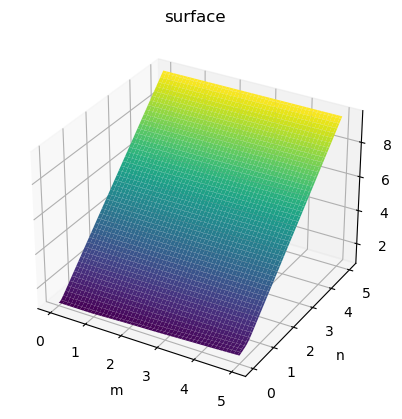

In [16]:
plot_3d_func(agent.solution[T].deposit_stage.dvdn_func.cFunc, 0, 5)

CPU times: user 18 µs, sys: 1e+03 ns, total: 19 µs
Wall time: 5.01 µs


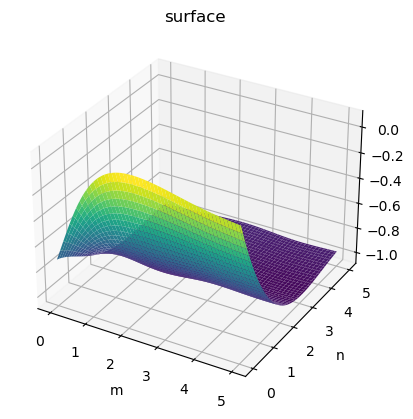

In [17]:
%time
plot_3d_func(agent.solution[T].deposit_stage.gaussian_interp, 0, 5)

## Grids

In [18]:
def scatter_hist(x, y, color, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    hist = ax.scatter(x, y, c=color, cmap="viridis", alpha=0.6)

    # now determine nice limits by hand:
    binwidth = 1.5
    xymax = max(np.max(x), np.max(y))
    xymin = min(np.min(x), np.min(y))
    top = (int(xymax / binwidth) + 1) * binwidth
    bottom = (int(xymin / binwidth) + 1) * binwidth

    bins = np.arange(bottom, top + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")

    return hist

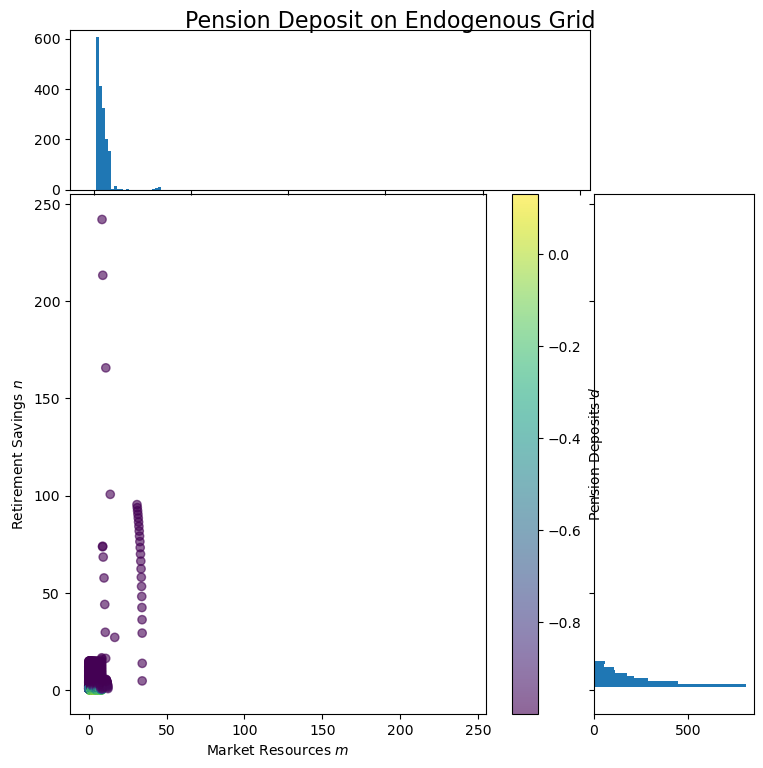

In [19]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = agent.solution[T].deposit_stage.gaussian_interp.grids[0]
y = agent.solution[T].deposit_stage.gaussian_interp.grids[1]
color = agent.solution[T].deposit_stage.gaussian_interp.values

idx = np.logical_or(x < 0, y < 0)

x = x[~idx]
y = y[~idx]
color = color[~idx]

# use the previously defined function
hist = scatter_hist(x, y, color, ax, ax_histx, ax_histy)
cbar = fig.colorbar(hist)
cbar.ax.set_ylabel("Pension Deposits $d$")

fig.suptitle("Pension Deposit on Endogenous Grid", fontsize=16)
ax.set_xlabel("Market Resources $m$")
ax.set_ylabel("Retirement Savings $n$")
plt.show()
fig.savefig(figures_path + "EndogenousGrid.svg")

In [20]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

(-1.0, 10.0)

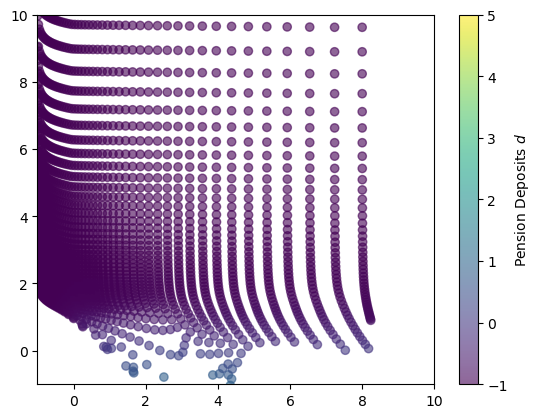

In [21]:
fig, ax = plt.subplots()
plot = ax.scatter(
    grids["mMat"],
    grids["nMat"],
    c=grids["dMat"],
    cmap="viridis",
    vmin=-1,
    vmax=5,
    plotnonfinite=True,
    alpha=0.6,
)
cbar = fig.colorbar(plot)
cbar.ax.set_ylabel("Pension Deposits $d$")

plt.xlim([-1, 10])
plt.ylim([-1, 10])

KeyError: 'b2Mat'

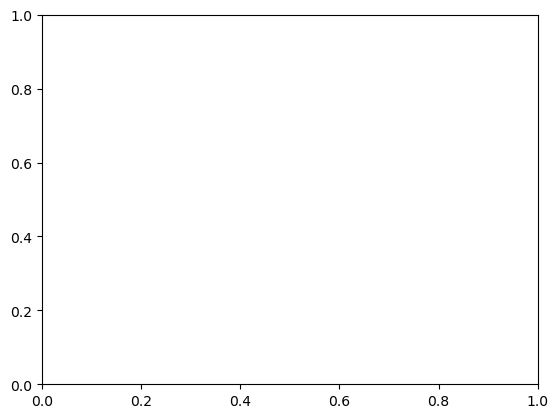

In [22]:
fig, ax = plt.subplots()
scatter = ax.scatter(
    grids["lMat"],
    grids["b2Mat"],
    c=np.maximum(grids["dMat"], 0),
    cmap="viridis",
    vmin=-2,
    vmax=15,
    plotnonfinite=True,
    alpha=0.6,
)
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel("Pension Deposits $d$")

plt.title("Pension Deposits on Exogenous Post-Decision Grid")
plt.xlabel(r"Liquid Wealth $\ell$")
plt.ylabel("Retirement Balance $b$")
fig.savefig(figures_path + "ExogenousGrid.svg")

In [ ]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

In [ ]:
from HARK.interpolation._sklearn import GeneralizedRegressionUnstructuredInterp

In [ ]:
gauss_interp = GeneralizedRegressionUnstructuredInterp(
    grids["dMat"],
    [grids["mMat"], grids["nMat"]],
    model="gaussian-process",
    std=True,
    model_kwargs={"normalize_y": True},
)

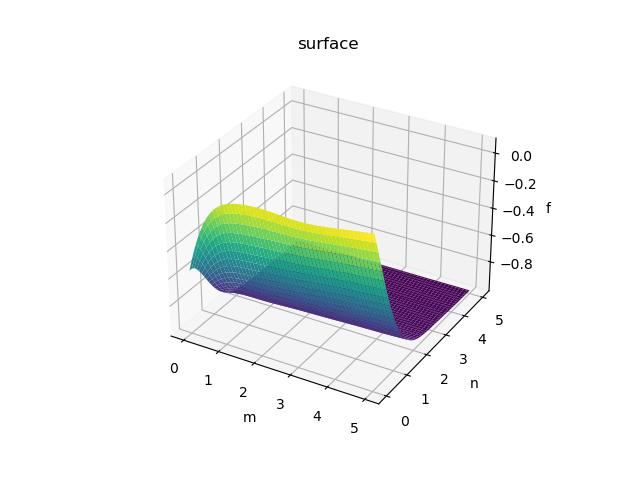

In [ ]:
get_ipython().run_line_magic("matplotlib", "widget")
plot_3d_func(gauss_interp, 0, 5)